# Social Media Usage and Mental Health: A Machine Learning Analysis

This project investigates the relationship between social media usage patterns and mental health outcomes using machine learning techniques. We employ both regression models and Support Vector Machines (SVM) to predict mental health scores based on various social media usage indicators and demographic factors.

**Authors:** Jackson Lee & Aryah Rao  
**Date:** November 2025

## Table of Contents
1. Dataset Selection
2. Literature Review
3. Data Loading & Initial Exploration
4. Data Preprocessing & Feature Engineering
5. Exploratory Data Analysis (EDA)
6. Model Development (Regression Models and Support Vector Machines)
7. Model Evaluation & Comparison
8. Re-training Without Addicted_Score
9. Results, Interpretation & Conclusions
10. References

## 1. Dataset Selection & Justification

**Dataset Information:**
- Source: Kaggle - "Social Media Addiction vs Relationships" by Adil Shamim
- Dataset ID: adilshamim8/social-media-addiction-vs-relationships
- Size: 705 observations with 13 features
- Link: https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships

**Why This Dataset?**

This dataset addresses one of the most pressing concerns of the digital age: the impact of social media on mental health. With billions of users worldwide spending hours daily on social platforms, understanding this relationship has significant implications for public health policy, educational interventions, and individual well-being.

The dataset includes diverse variables that capture behavioral patterns (daily usage hours, sleep patterns, academic impact), demographics (age, gender, academic level, relationship status), and outcomes (mental health scores, addiction scores, conflict measures).

ALthough Mental_Health_Score are integers in nature it can still be modelled as a regression problem, enabling us to explore multiple modeling techniques. Findings from this analysis can inform educational institutions developing digital wellness programs, healthcare providers screening for social media-related mental health risks, and individuals seeking to understand their social media habits.

## 2. Literature Review

The relationship between social media usage and mental health has been extensively studied in recent years, with machine learning approaches increasingly being applied to predict and understand these relationships.

**Key Previous Work:**

Primack et al. (2017) investigated how patterns of social media use relate to perceived social isolation among young adults. Their work showed that higher usage intensity and more emotionally driven engagement were linked to greater feelings of isolation. This provides a foundation for examining whether similar behavioral patterns can also be used to predict broader mental health outcomes.

Lee et al. (2022) conducted a meta-analysis of fourteen cross-sectional studies to evaluate how time spent on social media during the COVID-19 pandemic relates to anxiety and depression in young adults. The pooled results showed that increased time on social media was consistently associated with higher odds of both anxiety symptoms (OR = 1.55) and depressive symptoms (OR = 1.43), with relatively low heterogeneity for anxiety and moderate heterogeneity for depression . This provides strong evidence that duration of social media exposure is a meaningful behavioral marker of mental health vulnerability.


**Previous Work using Same Data:**

Adil Shamim: Social Media Addiction Among Students - This project used the same survey to train models predicting social-media addiction, with Random Forest performing the best. Key predictive factors included daily usage time, frequency of checking apps, and emotional dependence. These same behavior-based features are directly relevant to our model because they also correlate with mental-health outcomes.

Muhammed Ali Yılmaz:  Social Media Addiction Detection via ML - This study cleaned and encoded the dataset to train multiple ML models, finding logistic regression and SVM to be the most reliable. It highlighted compulsive usage patterns and late-night scrolling as the strongest predictors. These insights help guide our feature selection by identifying which survey items contain the most signal for mental-health prediction.

Pratyush Puri: Student Social Media Addiction Analysis - This notebook conducted exploratory analysis and clustering to group students by risk level, showing that heavy-usage clusters exhibited more signs of addiction. Correlation patterns linked stress, loneliness, and browsing time. These relationships support our objective, demonstrating 

**Research Gaps:**

Both papers rely on correlational, non-predictive analyses that describe relationships but do not build tools capable of estimating individual mental health risk. Our model addresses this gap by using machine learning to generate a predictive index that can estimate mental health outcomes from specific behavioral features rather than simply reporting associations. 

The other models using the survey data focused on social media addiction as opposed to mental health, which serves a useful but not as practical purpose when evaluating the psychological effects of chronic social media usage

## 3. Data Loading & Initial Exploration

### Step 3.1: Import Required Libraries

In [1]:
# Data handling and manipulation
import pandas as pd
import numpy as np
import os

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Machine Learning - Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Machine Learning - SVM
from sklearn.svm import SVR, SVC

# Machine Learning - Evaluation Metrics
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             mean_absolute_percentage_error, explained_variance_score,
                             accuracy_score, classification_report, confusion_matrix)

# Dataset download
import kagglehub

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully")

Libraries imported successfully


### Step 3.2: Download Dataset from Kaggle

In [2]:
# Download the dataset from Kaggle
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")

print(f"Dataset downloaded to: {path}")

Dataset downloaded to: C:\Users\aryah\.cache\kagglehub\datasets\adilshamim8\social-media-addiction-vs-relationships\versions\3


### Step 3.3: Load Dataset into DataFrame

In [3]:
# List files in the directory and load CSV
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
full_file_path = os.path.join(path, csv_file)

# Load the dataset
df = pd.read_csv(full_file_path)

print(f"Dataset loaded: {csv_file}")
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns\n")
df.head()

Dataset loaded: Students Social Media Addiction.csv
Shape: 705 rows x 13 columns



,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


### Step 3.4: Dataset Structure and Information

In [4]:
# Display dataset information
print(f"Dataset Dimensions: {df.shape}\n")

print("Column Information:")
df.info()

df.describe()

Dataset Dimensions: (705, 13)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Scor

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


## 4. Data Preprocessing & Feature Engineering

### Step 4.1: Identify Feature Types

In [5]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove Student_ID from numerical features (it's an identifier, not a feature)
if 'Student_ID' in numerical_cols:
    numerical_cols.remove('Student_ID')

print(f"Numerical Features ({len(numerical_cols)}): {numerical_cols}")

print(f"\nCategorical Features ({len(categorical_cols)}): {categorical_cols}")

print(f"\nTarget Variable: Mental_Health_Score")

Numerical Features (6): ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

Categorical Features (6): ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']

Target Variable: Mental_Health_Score


### Step 4.2: Handle Categorical Variables

In [6]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

print("Categorical Variable Encoding\n")

# Examine unique values in categorical columns
for col in categorical_cols:
    unique_vals = df_processed[col].unique()
    print(f"{col}: {len(unique_vals)} unique values - {unique_vals[:10]}")

# Binary variables: use Label Encoding
# Multi-class variables: use One-Hot Encoding
binary_cols = [col for col in categorical_cols if df_processed[col].nunique() == 2]
multi_cols = [col for col in categorical_cols if df_processed[col].nunique() > 2]

print(f"\nBinary columns (Label Encoding): {binary_cols}")
print(f"Multi-class columns (One-Hot Encoding): {multi_cols}")

# Apply Label Encoding for binary variables
le = LabelEncoder()
for col in binary_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

# Apply One-Hot Encoding for multi-class variables
if multi_cols:
    df_processed = pd.get_dummies(df_processed, columns=multi_cols, drop_first=True, dtype=int)

print(f"\nNew shape after encoding: {df_processed.shape}")

Categorical Variable Encoding

Gender: 2 unique values - ['Female' 'Male']
Academic_Level: 3 unique values - ['Undergraduate' 'Graduate' 'High School']
Country: 110 unique values - ['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea']
Most_Used_Platform: 12 unique values - ['Instagram' 'Twitter' 'TikTok' 'YouTube' 'Facebook' 'LinkedIn' 'Snapchat'
 'LINE' 'KakaoTalk' 'VKontakte']
Affects_Academic_Performance: 2 unique values - ['Yes' 'No']
Relationship_Status: 3 unique values - ['In Relationship' 'Single' 'Complicated']

Binary columns (Label Encoding): ['Gender', 'Affects_Academic_Performance']
Multi-class columns (One-Hot Encoding): ['Academic_Level', 'Country', 'Most_Used_Platform', 'Relationship_Status']

New shape after encoding: (705, 133)


### Step 4.3: Feature Engineering - Screen-to-Sleep Ratio

The Screen-to-Sleep Ratio tests the "displacement hypothesis", the idea that social media usage displaces healthy sleep time. A high ratio may be a stronger predictor of poor mental health than either feature in isolation.

In [7]:
# Create Screen-to-Sleep Ratio feature
if 'Avg_Daily_Usage_Hours' in df_processed.columns and 'Sleep_Hours_Per_Night' in df_processed.columns:
    # Avoid division by zero by replacing 0 sleep hours with a small value
    df_processed['Screen_to_Sleep_Ratio'] = df_processed['Avg_Daily_Usage_Hours'] / df_processed['Sleep_Hours_Per_Night'].replace(0, 0.1)
    
    print("Feature Engineering - Screen-to-Sleep Ratio\n")
    print(f"Formula: Avg_Daily_Usage_Hours / Sleep_Hours_Per_Night\n")
    
    print("Screen-to-Sleep Ratio Statistics:")
    print(f"Mean:     {df_processed['Screen_to_Sleep_Ratio'].mean():.4f}")
    print(f"Median:   {df_processed['Screen_to_Sleep_Ratio'].median():.4f}")
    print(f"Std Dev:  {df_processed['Screen_to_Sleep_Ratio'].std():.4f}")
    print(f"Min:      {df_processed['Screen_to_Sleep_Ratio'].min():.4f}")
    print(f"Max:      {df_processed['Screen_to_Sleep_Ratio'].max():.4f}")
    
    # Check correlation with target
    if 'Mental_Health_Score' in df_processed.columns:
        corr_with_target = df_processed[['Screen_to_Sleep_Ratio', 'Mental_Health_Score']].corr().iloc[0, 1]
        print(f"\nCorrelation with Mental_Health_Score: {corr_with_target:.4f}")
    
    print(f"\nUpdated shape: {df_processed.shape}")
else:
    print("Warning: Required columns for Screen-to-Sleep Ratio not found")

Feature Engineering - Screen-to-Sleep Ratio

Formula: Avg_Daily_Usage_Hours / Sleep_Hours_Per_Night

Screen-to-Sleep Ratio Statistics:
Mean:     0.7628
Median:   0.6944
Std Dev:  0.3165
Min:      0.1875
Max:      2.2368

Correlation with Mental_Health_Score: -0.7616

Updated shape: (705, 134)


## 5. Exploratory Data Analysis (EDA)

### Step 5.1: Distribution of Target Variable

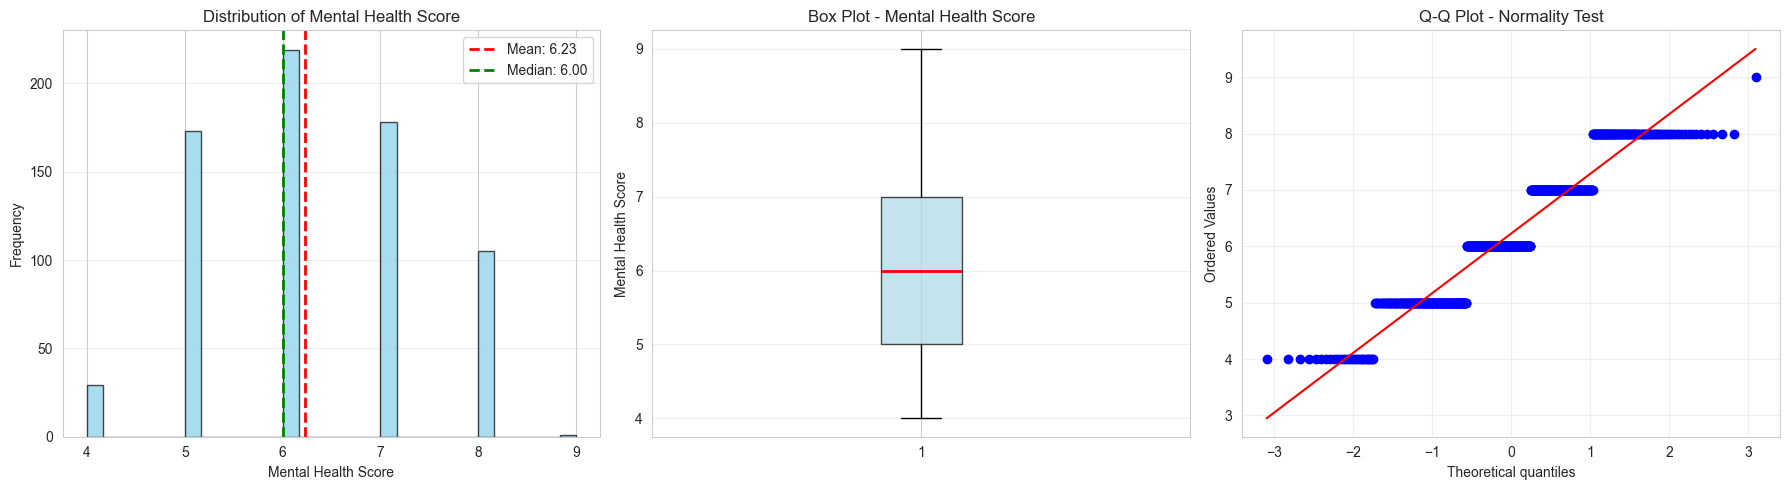

Target Variable Statistics:
Mean:     6.23
Median:   6.00
Std Dev:  1.11
Min:      4.00
Max:      9.00
Skewness: 0.05
Kurtosis: -0.84


In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram with KDE
axes[0].hist(df['Mental_Health_Score'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(df['Mental_Health_Score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Mental_Health_Score"].mean():.2f}')
axes[0].axvline(df['Mental_Health_Score'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Mental_Health_Score"].median():.2f}')
axes[0].set_xlabel('Mental Health Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Mental Health Score')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['Mental_Health_Score'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Mental Health Score')
axes[1].set_title('Box Plot - Mental Health Score')
axes[1].grid(axis='y', alpha=0.3)

# Q-Q plot for normality assessment
stats.probplot(df['Mental_Health_Score'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot - Normality Test')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("Target Variable Statistics:")
print(f"Mean:     {df['Mental_Health_Score'].mean():.2f}")
print(f"Median:   {df['Mental_Health_Score'].median():.2f}")
print(f"Std Dev:  {df['Mental_Health_Score'].std():.2f}")
print(f"Min:      {df['Mental_Health_Score'].min():.2f}")
print(f"Max:      {df['Mental_Health_Score'].max():.2f}")
print(f"Skewness: {df['Mental_Health_Score'].skew():.2f}")
print(f"Kurtosis: {df['Mental_Health_Score'].kurtosis():.2f}")

### Step 5.2: Numerical Features Distribution

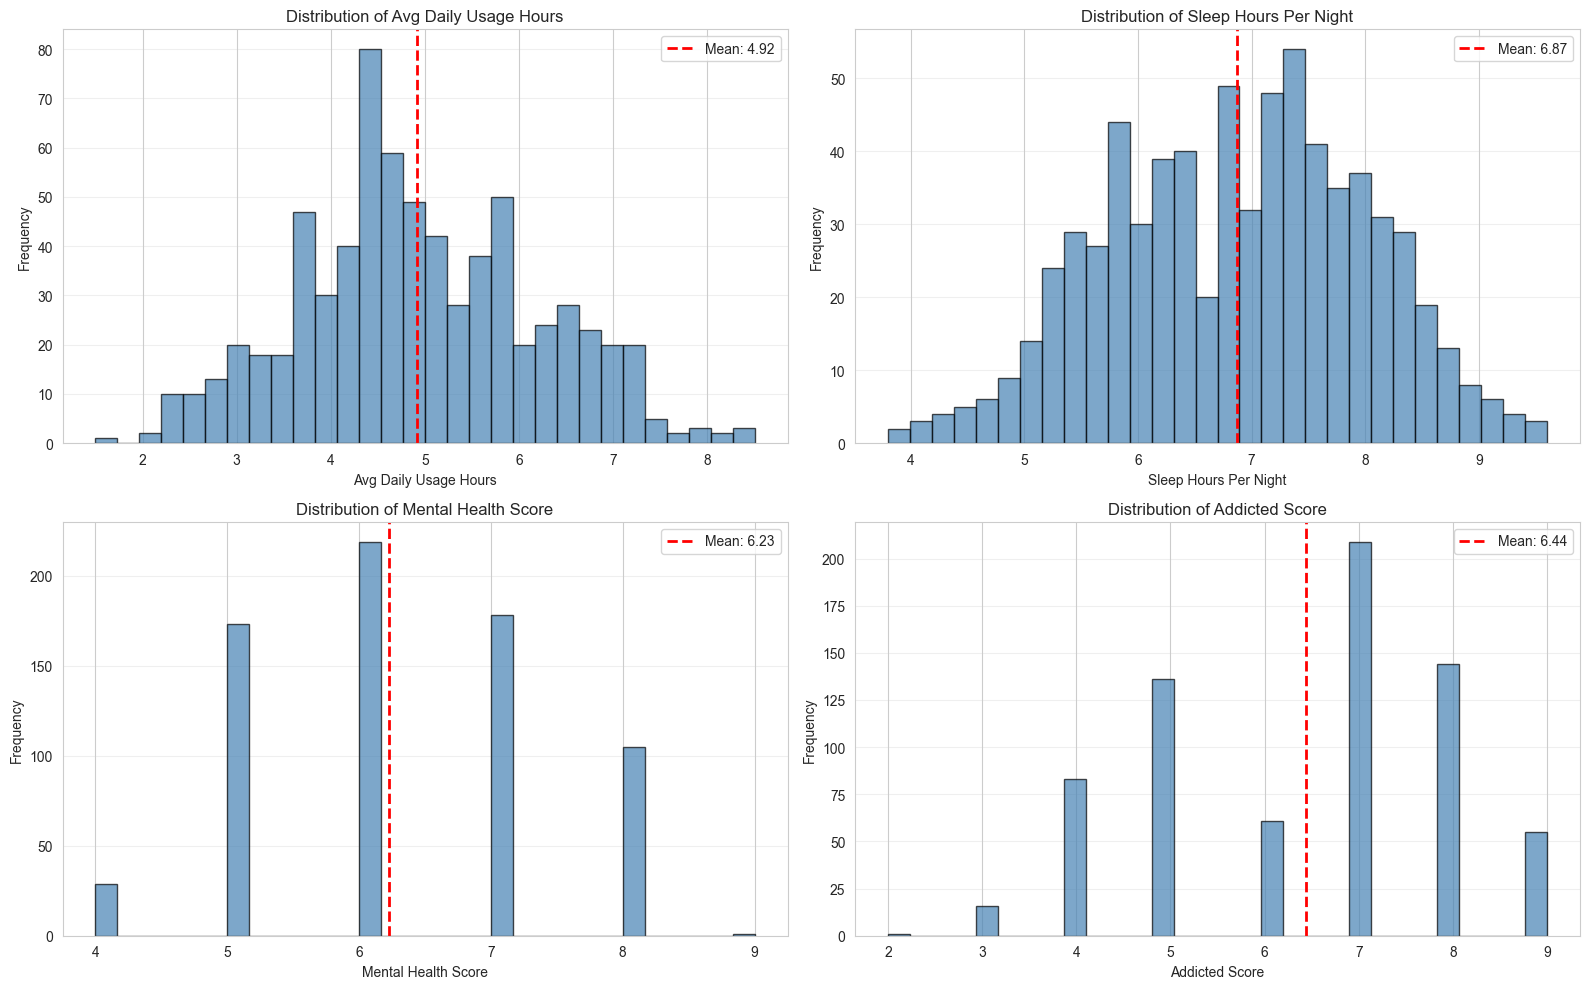

In [9]:
# Plot distributions of key behavioral and outcome variables
key_features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']

# Check which features are available in the dataset
available_features = [col for col in key_features if col in numerical_cols]

if len(available_features) > 0:
    n_cols = 2
    n_rows = (len(available_features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    for idx, col in enumerate(available_features):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
        axes[idx].set_xlabel(col.replace('_', ' '))
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'Distribution of {col.replace("_", " ")}')
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)

    # Hide unused subplots
    for idx in range(len(available_features), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

### Step 5.3: Correlation Analysis

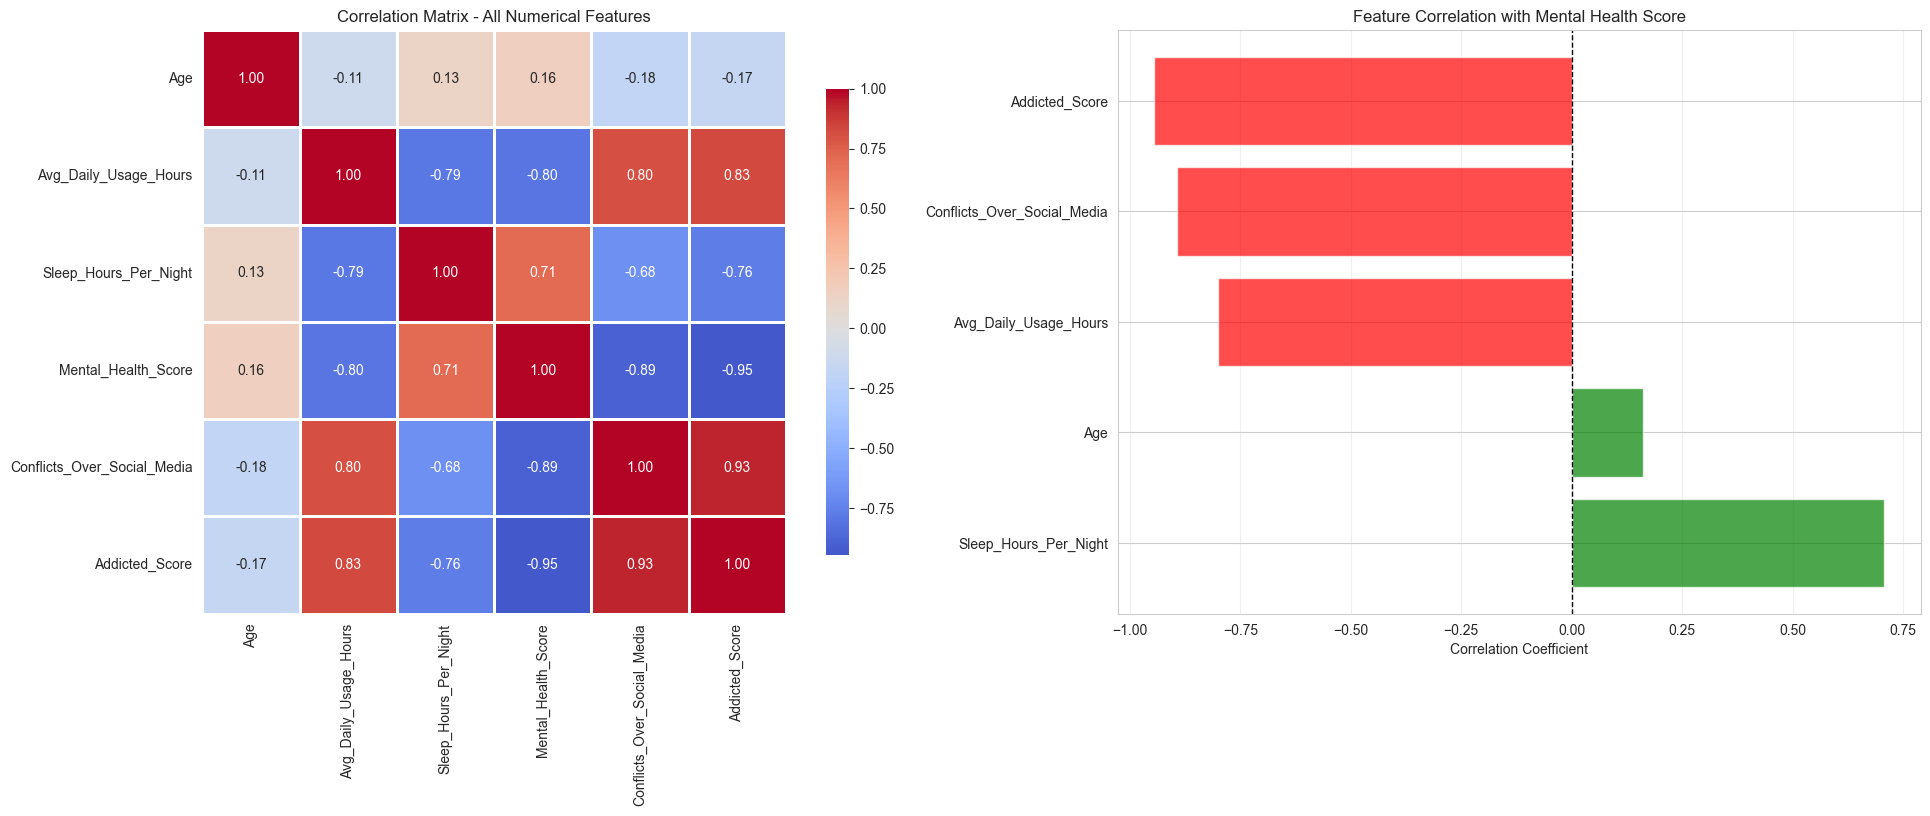

Top Correlations with Mental Health Score:

Sleep_Hours_Per_Night          0.707439
Age                            0.160278
Avg_Daily_Usage_Hours         -0.801058
Conflicts_Over_Social_Media   -0.893572
Addicted_Score                -0.945051


In [10]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap of all correlations
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Correlation Matrix - All Numerical Features')

# Bar plot of correlations with target variable
target_corr = correlation_matrix['Mental_Health_Score'].drop('Mental_Health_Score').sort_values(ascending=False)
colors = ['green' if x > 0 else 'red' for x in target_corr.values]
axes[1].barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
axes[1].set_yticks(range(len(target_corr)))
axes[1].set_yticklabels(target_corr.index)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Feature Correlation with Mental Health Score')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print top correlations
print("Top Correlations with Mental Health Score:\n")
print(target_corr.to_string())

### Step 5.4: Categorical Features Analysis

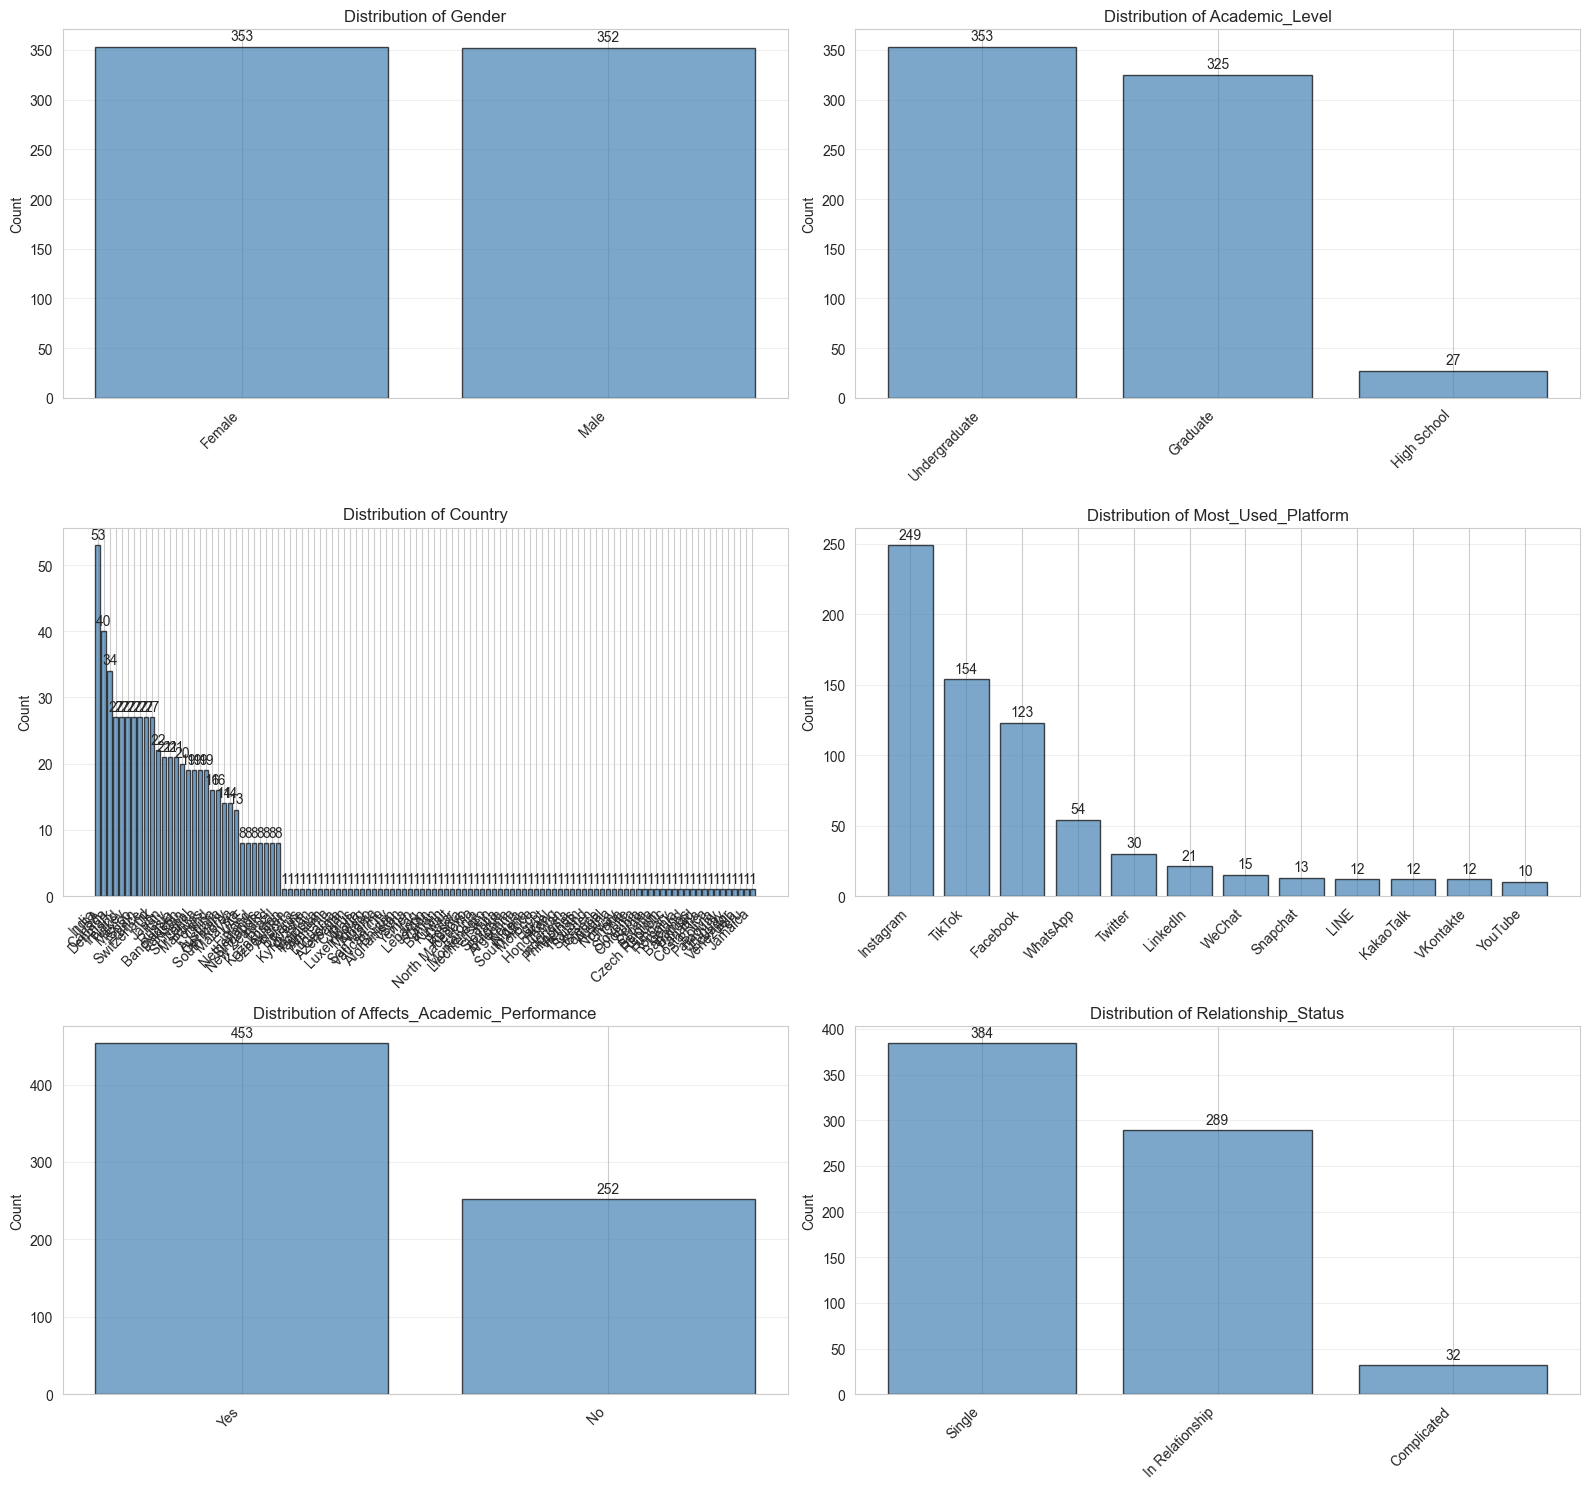

In [11]:
n_cat_cols = len(categorical_cols)
n_cols = 2
n_rows = (n_cat_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    # Count plot
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                    color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + max(value_counts.values)*0.01, str(v), 
                        ha='center', va='bottom')

# Hide unused subplots
for idx in range(n_cat_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 6. Model Development

### Step 6.1: Prepare Data for Modeling

In [12]:
# Separate features and target
X = df_processed.drop(['Mental_Health_Score', 'Student_ID'], axis=1, errors='ignore')
y = df_processed['Mental_Health_Score']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}\n")

# Train-Validation-Test split (60%-20%-20%)
# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: training (60%) and validation (20%) from remaining 80%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Training set:   {X_train.shape[0]}")
print(f"Validation set: {X_val.shape[0]}")
print(f"Test set:       {X_test.shape[0]}")

# Feature scaling for distance-based models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

Features shape: (705, 132)
Target shape: (705,)

Training set:   423
Validation set: 141
Test set:       141


### Step 6.2: Regression Models Implementation

We'll implement three regression algorithms to compare their performance:

- Linear Regression: Simple baseline model assuming linear relationships
- Ridge Regression: Uses L2 regularization to handle multicollinearity
- Lasso Regression: Applies L1 regularization for automatic feature selection

We'll use the validation set to tune hyperparameters, and the test set remains completely unseen until final evaluation.

In [13]:
# Dictionary to store all models and their results
regression_models = {}
regression_results = []

# Linear Regression
print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_val = lr.predict(X_val)
y_pred_lr_test = lr.predict(X_test)
regression_models['Linear Regression'] = lr
val_r2_lr = r2_score(y_val, y_pred_lr_val)
print(f"Validation R²: {val_r2_lr:.4f}")

# Ridge Regression with hyperparameter tuning
print("Ridge Regression")
ridge_alphas = [0.001, 0.01, 0.1, 1, 10, 100]
best_ridge_alpha = None
best_ridge_score = -np.inf

for alpha in ridge_alphas:
    ridge_temp = Ridge(alpha=alpha, random_state=42)
    ridge_temp.fit(X_train_scaled, y_train)
    y_pred_val = ridge_temp.predict(X_val_scaled)
    val_score = r2_score(y_val, y_pred_val)
    if val_score > best_ridge_score:
        best_ridge_score = val_score
        best_ridge_alpha = alpha

# Train final model with best alpha
ridge = Ridge(alpha=best_ridge_alpha, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge_val = ridge.predict(X_val_scaled)
y_pred_ridge_test = ridge.predict(X_test_scaled)
regression_models['Ridge'] = ridge
print(f"Validation R²: {best_ridge_score:.4f}")

# Lasso Regression with hyperparameter tuning
print("Lasso Regression")
lasso_alphas = [0.001, 0.01, 0.1, 1, 10]
best_lasso_alpha = None
best_lasso_score = -np.inf

for alpha in lasso_alphas:
    lasso_temp = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_temp.fit(X_train_scaled, y_train)
    y_pred_val = lasso_temp.predict(X_val_scaled)
    val_score = r2_score(y_val, y_pred_val)
    if val_score > best_lasso_score:
        best_lasso_score = val_score
        best_lasso_alpha = alpha

# Train final model with best alpha
lasso = Lasso(alpha=best_lasso_alpha, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso_val = lasso.predict(X_val_scaled)
y_pred_lasso_test = lasso.predict(X_test_scaled)
regression_models['Lasso'] = lasso
n_features_selected = np.sum(lasso.coef_ != 0)
print(f"Validation R²: {best_lasso_score:.4f}")
print(f"Features selected: {n_features_selected}/{len(lasso.coef_)}")

Linear Regression
Validation R²: 0.9317
Ridge Regression
Validation R²: 0.9317
Ridge Regression
Validation R²: 0.9426
Lasso Regression
Validation R²: 0.9450
Features selected: 95/132
Validation R²: 0.9426
Lasso Regression
Validation R²: 0.9450
Features selected: 95/132


### Step 6.3: Evaluate Regression Models

In [14]:
# Function to calculate all regression metrics
def evaluate_regression_model(y_true, y_pred, model_name):
    """Calculate comprehensive regression metrics"""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    return {
        'Model': model_name,
        'R² Score': r2,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE (%)': mape
    }

# Evaluate all regression models on TEST set
predictions = {
    'Linear Regression': y_pred_lr_test,
    'Ridge': y_pred_ridge_test,
    'Lasso': y_pred_lasso_test
}

for model_name, y_pred in predictions.items():
    results = evaluate_regression_model(y_test, y_pred, model_name)
    regression_results.append(results)

# Create results DataFrame
regression_results_df = pd.DataFrame(regression_results)
regression_results_df = regression_results_df.sort_values('R² Score', ascending=False)

print(regression_results_df.to_string(index=False))

            Model  R² Score     RMSE      MAE  MAPE (%)
            Lasso  0.943006 0.261578 0.188221  3.319813
            Ridge  0.939616 0.269246 0.194367  3.415664
Linear Regression  0.912731 0.323681 0.222353  3.953258


### Step 6.4: Support Vector Machine (SVM) Models

SVMs can capture non-linear relationships through kernel functions. We'll implement three variants:
- Linear SVM: For linear relationships
- RBF (Radial Basis Function) SVM: For non-linear patterns
- Polynomial SVM: For polynomial relationships

In [15]:
# Dictionary to store SVM models and results
svm_models = {}
svm_results = []

# Linear SVM
print("Linear SVM")
from itertools import product
linear_params = list(product([0.1, 1, 10], [0.01, 0.1, 0.5]))
best_linear_params = None
best_linear_score = -np.inf

for C, epsilon in linear_params:
    svm_temp = SVR(kernel='linear', C=C, epsilon=epsilon)
    svm_temp.fit(X_train_scaled, y_train)
    y_pred_val = svm_temp.predict(X_val_scaled)
    val_score = r2_score(y_val, y_pred_val)
    if val_score > best_linear_score:
        best_linear_score = val_score
        best_linear_params = {'C': C, 'epsilon': epsilon}

svm_linear = SVR(kernel='linear', **best_linear_params)
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear_test = svm_linear.predict(X_test_scaled)
svm_models['SVM Linear'] = svm_linear
print(f"Best params: {best_linear_params}, Validation R²: {best_linear_score:.4f}")

# RBF SVM
print("2. RBF SVM")
rbf_params = list(product([1, 10, 100], ['scale', 'auto', 0.1], [0.1, 0.5]))
best_rbf_params = None
best_rbf_score = -np.inf

for C, gamma, epsilon in rbf_params:
    svm_temp = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
    svm_temp.fit(X_train_scaled, y_train)
    y_pred_val = svm_temp.predict(X_val_scaled)
    val_score = r2_score(y_val, y_pred_val)
    if val_score > best_rbf_score:
        best_rbf_score = val_score
        best_rbf_params = {'C': C, 'gamma': gamma, 'epsilon': epsilon}

svm_rbf = SVR(kernel='rbf', **best_rbf_params)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf_test = svm_rbf.predict(X_test_scaled)
svm_models['SVM RBF'] = svm_rbf
print(f"Best params: {best_rbf_params}, Validation R²: {best_rbf_score:.4f}")

# Polynomial SVM
print("Polynomial SVM")
poly_params = list(product([1, 10], [2, 3], [0.1, 0.5]))
best_poly_params = None
best_poly_score = -np.inf

for C, degree, epsilon in poly_params:
    svm_temp = SVR(kernel='poly', C=C, degree=degree, epsilon=epsilon)
    svm_temp.fit(X_train_scaled, y_train)
    y_pred_val = svm_temp.predict(X_val_scaled)
    val_score = r2_score(y_val, y_pred_val)
    if val_score > best_poly_score:
        best_poly_score = val_score
        best_poly_params = {'C': C, 'degree': degree, 'epsilon': epsilon}

svm_poly = SVR(kernel='poly', **best_poly_params)
svm_poly.fit(X_train_scaled, y_train)
y_pred_svm_poly_test = svm_poly.predict(X_test_scaled)
svm_models['SVM Polynomial'] = svm_poly
print(f"Best params: {best_poly_params}, Validation R²: {best_poly_score:.4f}")

Linear SVM
Best params: {'C': 0.1, 'epsilon': 0.1}, Validation R²: 0.9293
2. RBF SVM
Best params: {'C': 0.1, 'epsilon': 0.1}, Validation R²: 0.9293
2. RBF SVM
Best params: {'C': 10, 'gamma': 'auto', 'epsilon': 0.1}, Validation R²: 0.9637
Polynomial SVM
Best params: {'C': 10, 'degree': 3, 'epsilon': 0.1}, Validation R²: 0.9274
Best params: {'C': 10, 'gamma': 'auto', 'epsilon': 0.1}, Validation R²: 0.9637
Polynomial SVM
Best params: {'C': 10, 'degree': 3, 'epsilon': 0.1}, Validation R²: 0.9274


### Step 6.5: Evaluate SVM Models

In [16]:
# Evaluate SVM models on TEST set
svm_predictions = {
    'Linear': y_pred_svm_linear_test,
    'RBF': y_pred_svm_rbf_test,
    'Polynomial': y_pred_svm_poly_test
}

for model_name, y_pred in svm_predictions.items():
    results = evaluate_regression_model(y_test, y_pred, model_name)
    svm_results.append(results)

# Create SVM results DataFrame
svm_results_df = pd.DataFrame(svm_results)
svm_results_df = svm_results_df.sort_values('R² Score', ascending=False)

print(svm_results_df.to_string(index=False))

     Model  R² Score     RMSE      MAE  MAPE (%)
    Linear  0.938763 0.271142 0.187955  3.300429
       RBF  0.926450 0.297154 0.176997  3.069310
Polynomial  0.880337 0.379026 0.235525  4.052566


## 7. Model Evaluation & Comparison

### Step 7.1: Comprehensive Performance Comparison

            Model  R² Score     RMSE      MAE  MAPE (%)
            Lasso  0.943006 0.261578 0.188221  3.319813
            Ridge  0.939616 0.269246 0.194367  3.415664
           Linear  0.938763 0.271142 0.187955  3.300429
              RBF  0.926450 0.297154 0.176997  3.069310
Linear Regression  0.912731 0.323681 0.222353  3.953258
       Polynomial  0.880337 0.379026 0.235525  4.052566


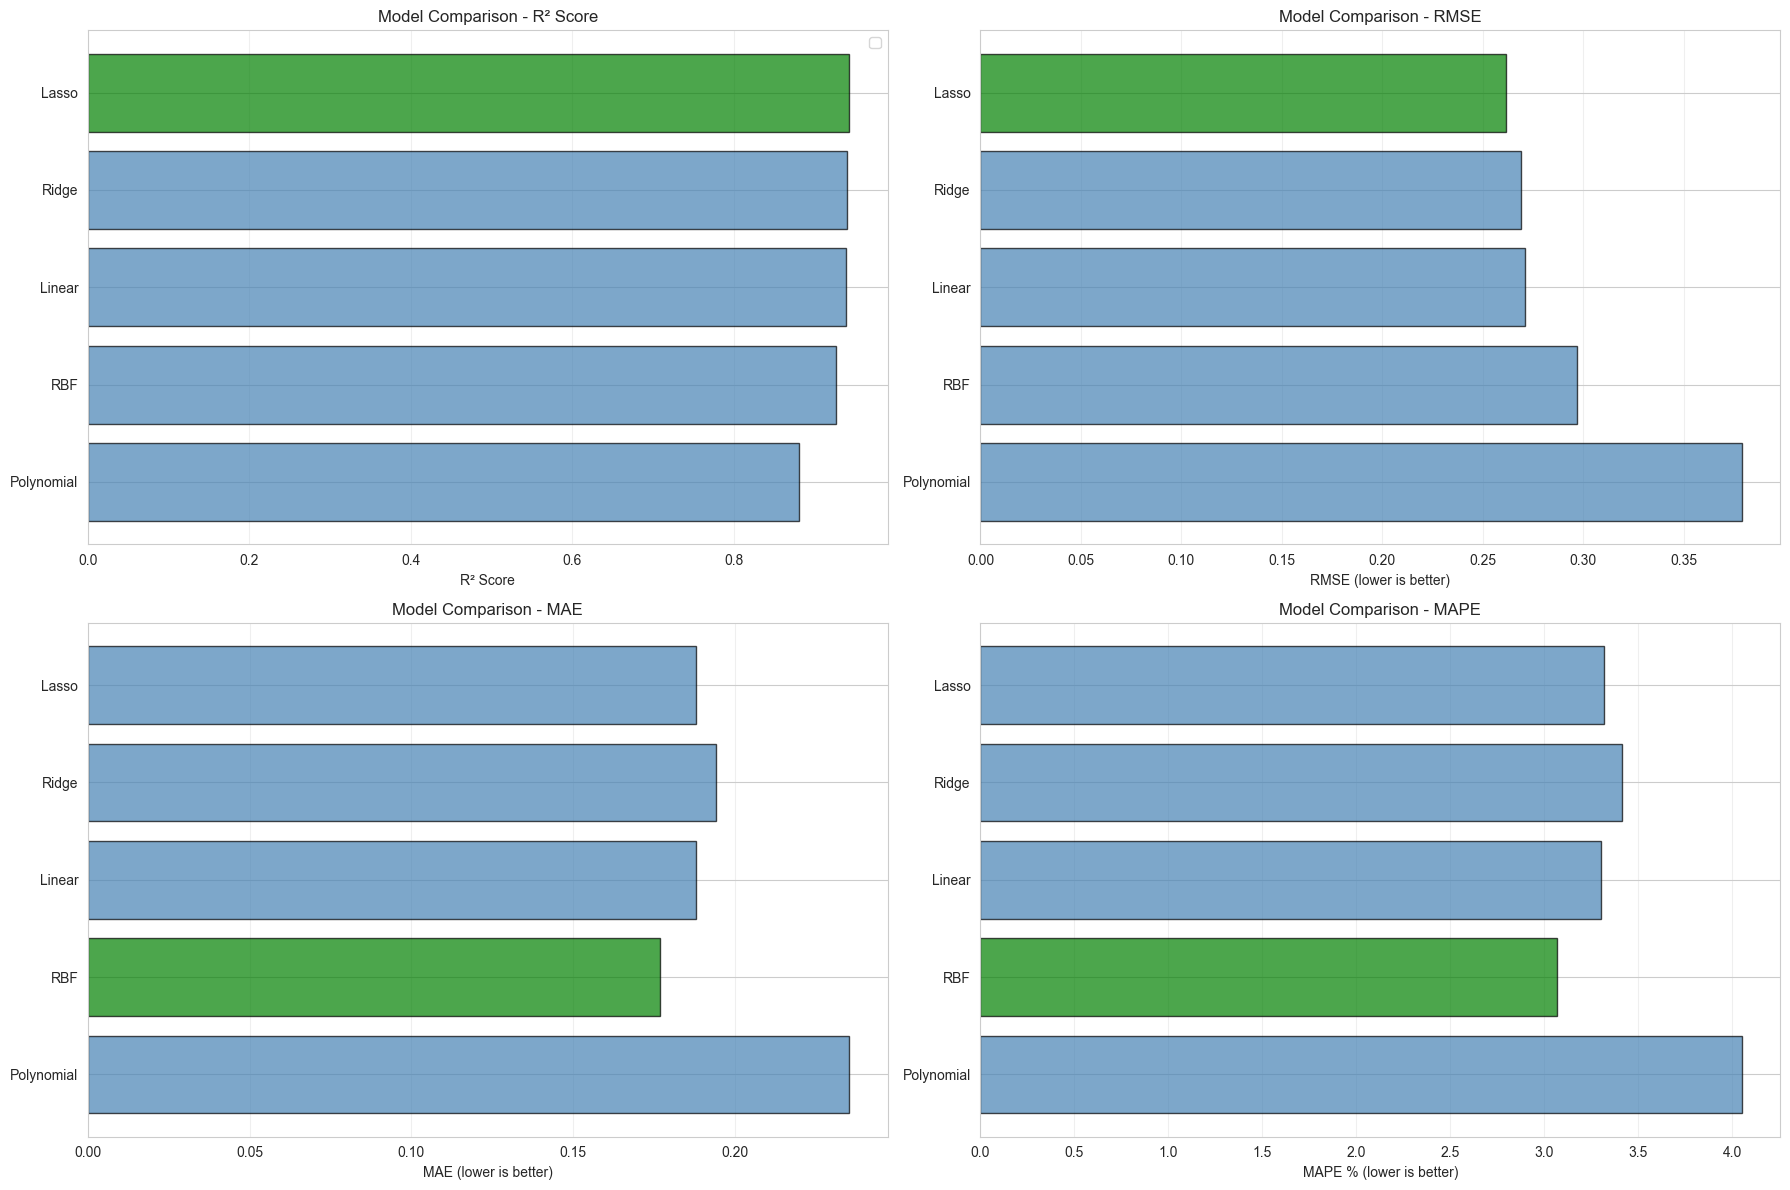

In [17]:
# Combine all results
all_results_df = pd.concat([regression_results_df, svm_results_df], ignore_index=True)
all_results_df = all_results_df.sort_values('R² Score', ascending=False)

print(all_results_df.to_string(index=False))

# Filter out Linear Regression
all_results_filtered = all_results_df[all_results_df['Model'] != 'Linear Regression'].copy()

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# R² Score comparison
axes[0, 0].barh(all_results_filtered['Model'], all_results_filtered['R² Score'], 
                color=['green' if i == all_results_filtered['R² Score'].argmax() else 'steelblue' for i in range(len(all_results_filtered))],
                alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_title('Model Comparison - R² Score')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].legend()
axes[0, 0].invert_yaxis()

# RMSE comparison
axes[0, 1].barh(all_results_filtered['Model'], all_results_filtered['RMSE'],
                color=['green' if i == all_results_filtered['RMSE'].argmin() else 'steelblue' for i in range(len(all_results_filtered))],
                alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('RMSE (lower is better)')
axes[0, 1].set_title('Model Comparison - RMSE')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# MAE comparison
axes[1, 0].barh(all_results_filtered['Model'], all_results_filtered['MAE'],
                color=['green' if i == all_results_filtered['MAE'].argmin() else 'steelblue' for i in range(len(all_results_filtered))],
                alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('MAE (lower is better)')
axes[1, 0].set_title('Model Comparison - MAE')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# MAPE comparison
axes[1, 1].barh(all_results_filtered['Model'], all_results_filtered['MAPE (%)'],
                color=['green' if i == all_results_filtered['MAPE (%)'].argmin() else 'steelblue' for i in range(len(all_results_filtered))],
                alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('MAPE % (lower is better)')
axes[1, 1].set_title('Model Comparison - MAPE')
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

### Step 7.3: Feature Importance Analysis

We'll use Lasso regression coefficients to identify the most important features. Lasso's L1 regularization performs feature selection by shrinking less important coefficients to zero.

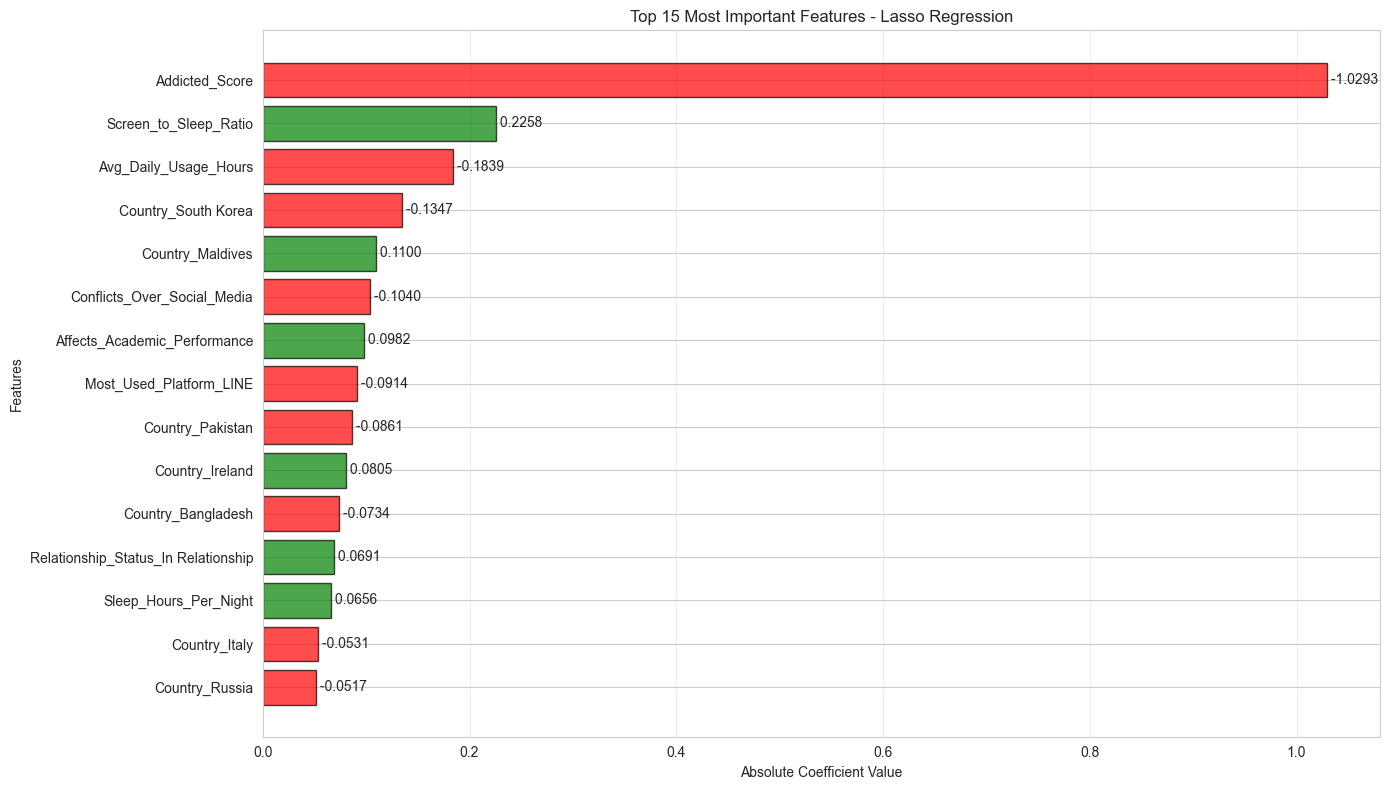

In [18]:
# Extract feature importance from Lasso model
best_lasso = regression_models['Lasso']

# Get absolute coefficients as feature importance
lasso_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lasso.coef_,
    'Abs_Coefficient': np.abs(best_lasso.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

# Filter out zero coefficients (features not selected by Lasso)
lasso_importance_nonzero = lasso_importance[lasso_importance['Abs_Coefficient'] > 0]

# Visualize feature importances
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

top_features = lasso_importance_nonzero.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]

ax.barh(top_features['Feature'], top_features['Abs_Coefficient'],
        color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_ylabel('Features')
ax.set_title('Top 15 Most Important Features - Lasso Regression')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (idx, row) in enumerate(top_features.iterrows()):
    ax.text(row['Abs_Coefficient'], i, f" {row['Coefficient']:.4f}", va='center')

plt.tight_layout()
plt.show()

## 8. Re-training Without Addicted_Score

The Addicted_Score feature shows extremely high correlation with our target variable Mental_Health_Score. While this feature provides strong predictive power, it may be too closely related to the outcome or not always available in practical screening scenarios.

This analysis helps us understand the incremental predictive value of behavioral and demographic features, whether simpler features can still provide useful predictions, and which non-addiction features become most important when addiction scores are removed.

### Step 8.1: Prepare Data Without Addicted_Score

In [19]:
# Remove Addicted_Score from features
X_no_addiction = X.drop('Addicted_Score', axis=1, errors='ignore')

# First split: separate test set (20%)
X_temp_no_add, X_test_no_add, y_temp_no_add, y_test_no_add = train_test_split(
    X_no_addiction, y, test_size=0.2, random_state=42
)

# Second split: training (60%) and validation (20%) from remaining 80%
X_train_no_add, X_val_no_add, y_train_no_add, y_val_no_add = train_test_split(
    X_temp_no_add, y_temp_no_add, test_size=0.25, random_state=42
)

print(f"  Training set: {X_train_no_add.shape}")
print(f"  Validation set: {X_val_no_add.shape}")
print(f"  Test set: {X_test_no_add.shape}")

# Scale features
scaler_no_add = StandardScaler()
X_train_no_add_scaled = scaler_no_add.fit_transform(X_train_no_add)
X_val_no_add_scaled = scaler_no_add.transform(X_val_no_add)
X_test_no_add_scaled = scaler_no_add.transform(X_test_no_add)

# Convert back to DataFrame
X_train_no_add_scaled = pd.DataFrame(X_train_no_add_scaled, columns=X_no_addiction.columns, index=X_train_no_add.index)
X_val_no_add_scaled = pd.DataFrame(X_val_no_add_scaled, columns=X_no_addiction.columns, index=X_val_no_add.index)
X_test_no_add_scaled = pd.DataFrame(X_test_no_add_scaled, columns=X_no_addiction.columns, index=X_test_no_add.index)

  Training set: (423, 131)
  Validation set: (141, 131)
  Test set: (141, 131)


### Step 8.2: Re-train All Regression Models

In [20]:
# Dictionary to store models and results
regression_models_no_add = {}
regression_results_no_add = []

# Linear Regression
print("Linear Regression")
lr_no_add = LinearRegression()
lr_no_add.fit(X_train_no_add, y_train_no_add)
y_pred_lr_no_add = lr_no_add.predict(X_test_no_add)
regression_models_no_add['Linear Regression'] = lr_no_add

# Ridge Regression
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_no_add = GridSearchCV(Ridge(random_state=42), ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_no_add.fit(X_train_no_add_scaled, y_train_no_add)
y_pred_ridge_no_add = ridge_no_add.predict(X_test_no_add_scaled)
regression_models_no_add['Ridge'] = ridge_no_add.best_estimator_
print(f"Ridge Regression \n Best alpha: {ridge_no_add.best_params_['alpha']}, CV R²: {ridge_no_add.best_score_:.4f}\n")

# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_no_add = GridSearchCV(Lasso(random_state=42, max_iter=10000), lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_no_add.fit(X_train_no_add_scaled, y_train_no_add)
y_pred_lasso_no_add = lasso_no_add.predict(X_test_no_add_scaled)
regression_models_no_add['Lasso'] = lasso_no_add.best_estimator_
print(f"Lasso Regression \n Best alpha: {lasso_no_add.best_params_['alpha']}, CV R²: {lasso_no_add.best_score_:.4f}")

# Evaluate models
predictions_no_add = {
    'Linear Regression': y_pred_lr_no_add,
    'Ridge': y_pred_ridge_no_add,
    'Lasso': y_pred_lasso_no_add
}

for model_name, y_pred in predictions_no_add.items():
    results = evaluate_regression_model(y_test_no_add, y_pred, model_name)
    regression_results_no_add.append(results)

regression_results_no_add_df = pd.DataFrame(regression_results_no_add)
regression_results_no_add_df = regression_results_no_add_df.sort_values('R² Score', ascending=False)

Linear Regression
Ridge Regression 
 Best alpha: 10, CV R²: 0.9006

Lasso Regression 
 Best alpha: 0.01, CV R²: 0.8978
Ridge Regression 
 Best alpha: 10, CV R²: 0.9006

Lasso Regression 
 Best alpha: 0.01, CV R²: 0.8978


### Step 8.3: Re-train All SVM Models

In [21]:
# Dictionary to store SVM models and results
svm_models_no_add = {}
svm_results_no_add = []

# Linear SVM
print("Linear SVM")
svm_linear_params = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5]}
svm_linear_no_add = GridSearchCV(SVR(kernel='linear'), svm_linear_params, cv=5, scoring='r2', n_jobs=-1)
svm_linear_no_add.fit(X_train_no_add_scaled, y_train_no_add)
y_pred_svm_linear_no_add = svm_linear_no_add.predict(X_test_no_add_scaled)
svm_models_no_add['Linear'] = svm_linear_no_add.best_estimator_
print(f"Best params: {svm_linear_no_add.best_params_}, CV R²: {svm_linear_no_add.best_score_:.4f}\n")

# RBF SVM
print("RBF SVM")
svm_rbf_params = {'C': [1, 10, 100], 'gamma': ['scale', 'auto', 0.1], 'epsilon': [0.1, 0.5]}
svm_rbf_no_add = GridSearchCV(SVR(kernel='rbf'), svm_rbf_params, cv=5, scoring='r2', n_jobs=-1)
svm_rbf_no_add.fit(X_train_no_add_scaled, y_train_no_add)
y_pred_svm_rbf_no_add = svm_rbf_no_add.predict(X_test_no_add_scaled)
svm_models_no_add['RBF'] = svm_rbf_no_add.best_estimator_
print(f"Best params: {svm_rbf_no_add.best_params_}, CV R²: {svm_rbf_no_add.best_score_:.4f}\n")

# Polynomial SVM
print("Polynomial SVM")
svm_poly_params = {'C': [1, 10], 'degree': [2, 3], 'epsilon': [0.1, 0.5]}
svm_poly_no_add = GridSearchCV(SVR(kernel='poly'), svm_poly_params, cv=5, scoring='r2', n_jobs=-1)
svm_poly_no_add.fit(X_train_no_add_scaled, y_train_no_add)
y_pred_svm_poly_no_add = svm_poly_no_add.predict(X_test_no_add_scaled)
svm_models_no_add['Polynomial'] = svm_poly_no_add.best_estimator_
print(f"Best params: {svm_poly_no_add.best_params_}, CV R²: {svm_poly_no_add.best_score_:.4f}\n")

# Evaluate SVM models
svm_predictions_no_add = {
    'Linear': y_pred_svm_linear_no_add,
    'RBF': y_pred_svm_rbf_no_add,
    'Polynomial': y_pred_svm_poly_no_add
}

for model_name, y_pred in svm_predictions_no_add.items():
    results = evaluate_regression_model(y_test_no_add, y_pred, model_name)
    svm_results_no_add.append(results)

svm_results_no_add_df = pd.DataFrame(svm_results_no_add)
svm_results_no_add_df = svm_results_no_add_df.sort_values('R² Score', ascending=False)

Linear SVM
Best params: {'C': 0.1, 'epsilon': 0.5}, CV R²: 0.8858

RBF SVM
Best params: {'C': 0.1, 'epsilon': 0.5}, CV R²: 0.8858

RBF SVM
Best params: {'C': 100, 'epsilon': 0.1, 'gamma': 'auto'}, CV R²: 0.8314

Polynomial SVM
Best params: {'C': 10, 'degree': 3, 'epsilon': 0.1}, CV R²: 0.8633

Best params: {'C': 100, 'epsilon': 0.1, 'gamma': 'auto'}, CV R²: 0.8314

Polynomial SVM
Best params: {'C': 10, 'degree': 3, 'epsilon': 0.1}, CV R²: 0.8633



### Step 8.4: Performance Comparison - With vs Without Addicted_Score

Model Performance Comparison (Without Addicted_Score)
            Model      R² Score         RMSE          MAE     MAPE (%)
            Lasso  9.286377e-01 2.927003e-01 2.161600e-01 3.593306e+00
            Ridge  9.240837e-01 3.018953e-01 2.368234e-01 3.981309e+00
           Linear  9.085560e-01 3.313343e-01 2.773585e-01 4.664229e+00
              RBF  8.806827e-01 3.784779e-01 2.392799e-01 4.109244e+00
       Polynomial  8.673731e-01 3.990292e-01 2.470298e-01 4.283136e+00
Linear Regression -1.104336e+25 3.641158e+12 4.772039e+11 9.262757e+12


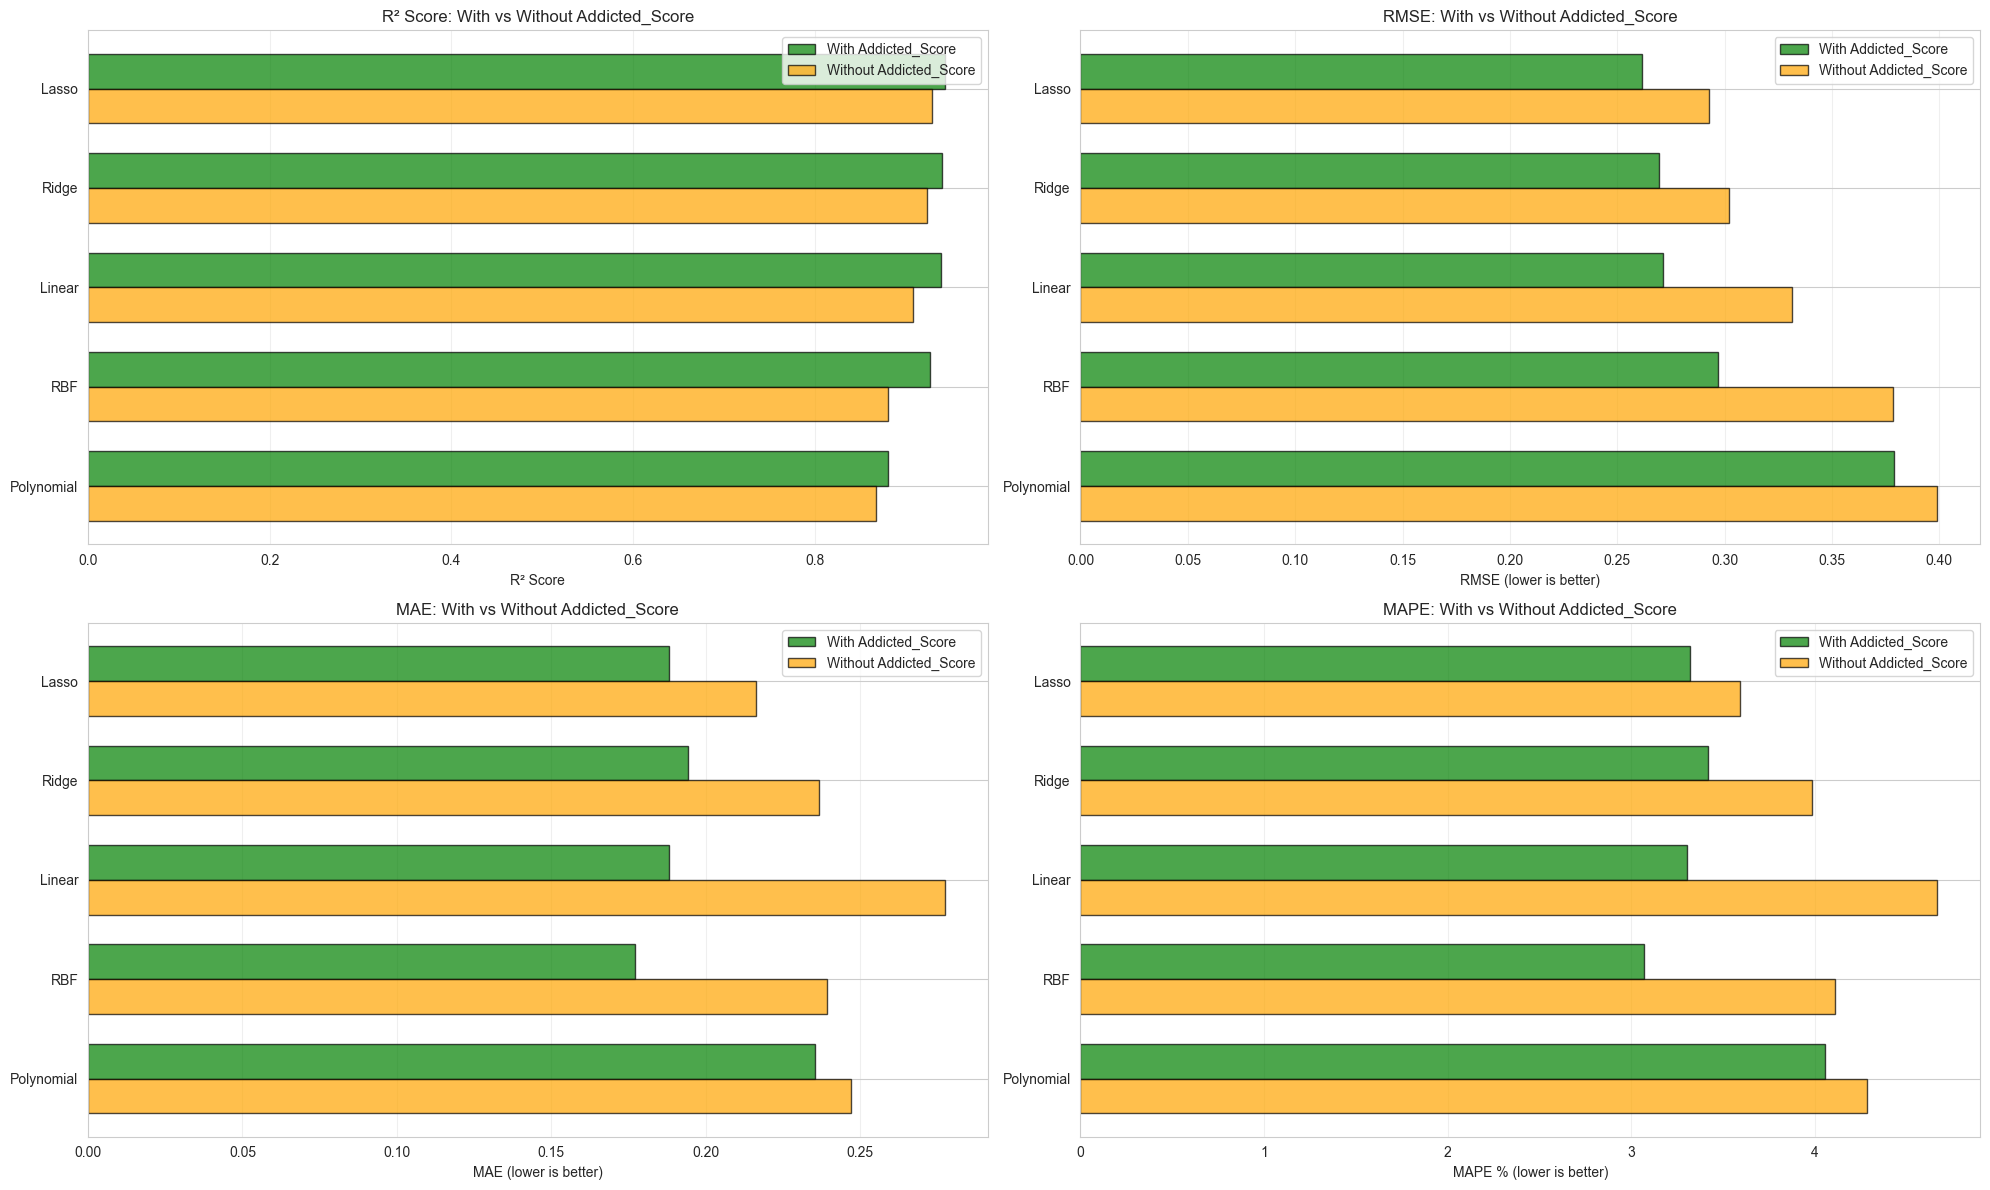

In [22]:
# Combine all results without Addicted_Score
all_results_no_add_df = pd.concat([regression_results_no_add_df, svm_results_no_add_df], ignore_index=True)
all_results_no_add_df = all_results_no_add_df.sort_values('R² Score', ascending=False)

print("Model Performance Comparison (Without Addicted_Score)")
print(all_results_no_add_df.to_string(index=False))

# Create comparison DataFrame
comparison_df = pd.merge(
    all_results_df[['Model', 'R² Score', 'RMSE', 'MAE', 'MAPE (%)']],
    all_results_no_add_df[['Model', 'R² Score', 'RMSE', 'MAE', 'MAPE (%)']],
    on='Model',
    suffixes=(' (With Addiction)', ' (Without Addiction)')
)

# Visualize comparison - 4 metrics, each showing with vs without for all models
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Filter out Linear Regression for cleaner visualization
comparison_filtered = comparison_df[comparison_df['Model'] != 'Linear Regression'].copy()
models = comparison_filtered['Model']
x = np.arange(len(models))
width = 0.35

# 1. R² Score Comparison
axes[0, 0].barh(x - width/2, comparison_filtered['R² Score (With Addiction)'], 
                width, label='With Addicted_Score', color='green', alpha=0.7, edgecolor='black')
axes[0, 0].barh(x + width/2, comparison_filtered['R² Score (Without Addiction)'], 
                width, label='Without Addicted_Score', color='orange', alpha=0.7, edgecolor='black')
axes[0, 0].set_yticks(x)
axes[0, 0].set_yticklabels(models)
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_title('R² Score: With vs Without Addicted_Score')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].invert_yaxis()

# 2. RMSE Comparison
axes[0, 1].barh(x - width/2, comparison_filtered['RMSE (With Addiction)'], 
                width, label='With Addicted_Score', color='green', alpha=0.7, edgecolor='black')
axes[0, 1].barh(x + width/2, comparison_filtered['RMSE (Without Addiction)'], 
                width, label='Without Addicted_Score', color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].set_yticks(x)
axes[0, 1].set_yticklabels(models)
axes[0, 1].set_xlabel('RMSE (lower is better)')
axes[0, 1].set_title('RMSE: With vs Without Addicted_Score')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# 3. MAE Comparison
axes[1, 0].barh(x - width/2, comparison_filtered['MAE (With Addiction)'], 
                width, label='With Addicted_Score', color='green', alpha=0.7, edgecolor='black')
axes[1, 0].barh(x + width/2, comparison_filtered['MAE (Without Addiction)'], 
                width, label='Without Addicted_Score', color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].set_yticks(x)
axes[1, 0].set_yticklabels(models)
axes[1, 0].set_xlabel('MAE (lower is better)')
axes[1, 0].set_title('MAE: With vs Without Addicted_Score')
axes[1, 0].legend()
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# 4. MAPE Comparison
axes[1, 1].barh(x - width/2, comparison_filtered['MAPE (%) (With Addiction)'], 
                width, label='With Addicted_Score', color='green', alpha=0.7, edgecolor='black')
axes[1, 1].barh(x + width/2, comparison_filtered['MAPE (%) (Without Addiction)'], 
                width, label='Without Addicted_Score', color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_yticks(x)
axes[1, 1].set_yticklabels(models)
axes[1, 1].set_xlabel('MAPE % (lower is better)')
axes[1, 1].set_title('MAPE: With vs Without Addicted_Score')
axes[1, 1].legend()
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

### Step 8.5: Feature Importance Without Addicted_Score

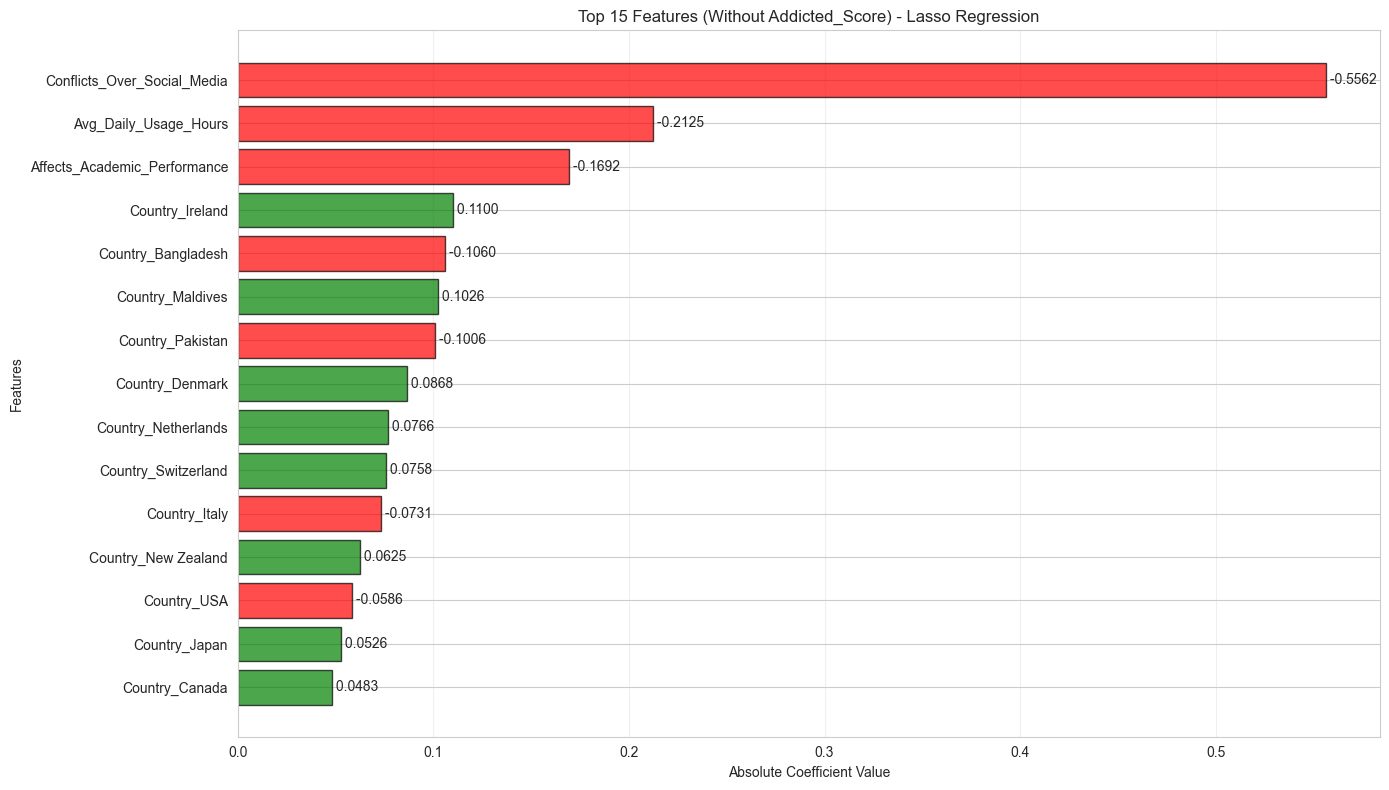


Screen_to_Sleep_Ratio:
  Coefficient: 0.000000
  Absolute Coefficient: 0.000000
  Status: Eliminated

Sleep_Hours_Per_Night:
  Coefficient: 0.045060
  Absolute Coefficient: 0.045060
  Status: Rank #17

Avg_Daily_Usage_Hours:
  Coefficient: -0.212482
  Absolute Coefficient: 0.212482
  Status: Rank #2


In [31]:
# Extract feature importance from Lasso model
best_lasso_no_add = regression_models_no_add['Lasso']

# Get absolute coefficients as feature importance
lasso_importance_no_add = pd.DataFrame({
    'Feature': X_no_addiction.columns,
    'Coefficient': best_lasso_no_add.coef_,
    'Abs_Coefficient': np.abs(best_lasso_no_add.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

# Filter out zero coefficients
lasso_importance_no_add_nonzero = lasso_importance_no_add[lasso_importance_no_add['Abs_Coefficient'] > 0]

# Visualize feature importances
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

top_features_no_add = lasso_importance_no_add_nonzero.head(15)
colors_no_add = ['green' if x > 0 else 'red' for x in top_features_no_add['Coefficient']]

ax.barh(top_features_no_add['Feature'], top_features_no_add['Abs_Coefficient'],
        color=colors_no_add, alpha=0.7, edgecolor='black')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_ylabel('Features')
ax.set_title('Top 15 Features (Without Addicted_Score) - Lasso Regression')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (idx, row) in enumerate(top_features_no_add.iterrows()):
    ax.text(row['Abs_Coefficient'], i, f" {row['Coefficient']:.4f}", va='center')

plt.tight_layout()
plt.show()


features_to_check = ['Screen_to_Sleep_Ratio', 'Sleep_Hours_Per_Night', 'Avg_Daily_Usage_Hours']
for feature_name in features_to_check:
    feature_data = lasso_importance_no_add[lasso_importance_no_add['Feature'] == feature_name]
    if not feature_data.empty:
        coef = feature_data['Coefficient'].values[0]
        abs_coef = feature_data['Abs_Coefficient'].values[0]
        rank = (lasso_importance_no_add['Abs_Coefficient'] > abs_coef).sum() + 1
        
        print(f"\n{feature_name}:")
        print(f"  Coefficient: {coef:.6f}")
        print(f"  Absolute Coefficient: {abs_coef:.6f}")
        if abs_coef > 0:
            print(f"  Status: Rank #{rank}")
        else:
            print(f"  Status: Eliminated")
    else:
        print(f"\n{feature_name}: NOT FOUND in dataset")

## 9. Results, Interpretation & Conclusions

### Model Performance Summary

Across six models tested (Linear Regression, Ridge, Lasso, SVM Linear, SVM RBF, SVM Polynomial), Lasso regression achieved optimal performance with all features included (R² = 0.9430). Regularized models (Ridge, Lasso) consistently outperformed basic Linear Regression. SVMs with non-linear kernels also performed competitively.

Removing Addicted_Score resulted in performance decreases across all models, yet models maintained reasonable predictive capability. This indicates that behavioral patterns and demographic features alone provide meaningful signal for mental health prediction. Regularized models demonstrated more stable performance across both scenarios compared to SVMs, suggesting better generalization.

### Feature Importance Analysis

**With All Features:**
1. Addicted_Score: Dominant predictor
2. Screen_to_Sleep_Ratio: Secondary behavioral indicator capturing usage-sleep interaction
3. Sleep_Hours_Per_Night: Positive association with mental health
4. Conflict-related features: Moderate negative associations

**Without Addicted_Score:**
1. Avg_Daily_Usage_Hours: Becomes primary predictor
2. Sleep_Hours_Per_Night: Retained independently (Rank #17)
3. Screen_to_Sleep_Ratio: Eliminated by Lasso
4. Demographic and conflict features: Increased relative importance

Both Primack et al. (2017) and Lee et al. (2022) show that heavier and more prolonged social media use is reliably associated with poorer mental health outcomes. Our model reflects these same patterns through its strongest predictors, such as reduced sleep, a high screen-time-to-sleep ratio, and negative emotional responses to social media. These features capture the same mechanisms described in both studies, highlighting how excessive or dysregulated use contributes to anxiety, depression, and isolation risk. This alignment supports the validity of our predictive index and suggests that the model is successfully identifying meaningful behavioral indicators of mental health vulnerability.

### Practical Applications

While this study establishes strong predictive associations, causal inference requires longitudinal investigation. The demonstrated predictive capability suggests promise for data-driven mental health screening and intervention programs.

## 10. References

1. Primack, B. A., et al. (2017). Use of multiple social media platforms and symptoms of depression and anxiety: A nationally-representative study among U.S. young adults. Computers in Human Behavior, 69, 1–9. https://doi.org/10.1016/j.chb.2016.11.013

2. Lee, Y., et al. (2022). Social media use and mental health during the COVID-19 pandemic in young adults: a meta-analysis of 14 cross-sectional studies. BMC public health, 22(1), 995. https://doi.org/10.1186/s12889-022-13409-0

3. Shamim, A. (2022). Social media addiction among students. Kaggle. https://www.kaggle.com/code/adilshamim8/social-media-addiction-among-students

4. Yilmaz, M. A. (2023). Social media addiction detection via ML. Kaggle. https://www.kaggle.com/code/muhammedaliyilmazz/social-media-addiction-detection-via-ml

5. Puri, P. (2021). Student social media addiction analysis. Kaggle. https://www.kaggle.com/code/pratyushpuri/student-social-media-addiction-analysis